In [2]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#To load Dataset
df=pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
loan = pd.read_csv("loan.csv",sep=",")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.shape

(39717, 111)

In [7]:
# summarising number of missing values in each column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [10]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
loan.isnull().sum().sort_values(ascending=False)

mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_pymnt                       0
total_acc                         0
total_pymnt_inv                   0
recoveries                        0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
pub_rec                           0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq              

In [11]:
#filling the missing data
print("Before filling missing values\n\n","#"*25682,"\n")
null_cols = ['mths_since_last_delinq', 'desc', 'emp_title','emp_length', 'pub_rec_bankruptcies', 'last_pymnt_d', 'chargeoff_within_12_mths','collections_12_mths_ex_med','revol_util','tax_liens','title','last_credit_pull_d']


for col in null_cols:
    print(f"{col}:\n{loan[col].value_counts()}\n","-"*25682)
    loan[col] = loan[col].fillna(
    loan[col].dropna().mode().values[0] )   

    
loan.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*25682,"\n")
for col in null_cols:
    print(f"\n{col}:\n{loan[col].value_counts()}\n","-"*25682)

Before filling missing values

 ########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



title:
Debt Consolidation                                                                  2184
Debt Consolidation Loan                                                             1729
Personal Loan                                                                        659
Consolidation                                                                        517
debt consolidation                                                                   505
Home Improvement                                                                     356
Credit Card Consolidation                                                            356
Debt consolidation                                                                   334
Small Business Loan                                                                  328
Credit Card Loan                                                                     317
Personal                                                                             308
Consolidation 

After filling missing values

 #########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_ba

In [16]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [18]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
#list of all the columns.columns
#Cols = loan.tolist()
#list of all the numeric columns
num = loan.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = loan.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  loan[num]
#categoric df
loan_cat = loan[cat]

INDIVIDUAL    39717
Name: application_type, dtype: int64


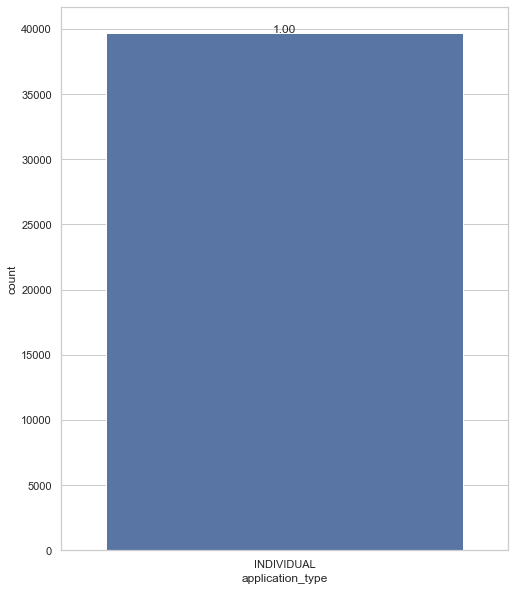

In [20]:
print(loan[cat[-1]].value_counts())
#loan[cat[-1]].hist(grid = False)

#print(i)
total = float(len(loan[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(loan[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

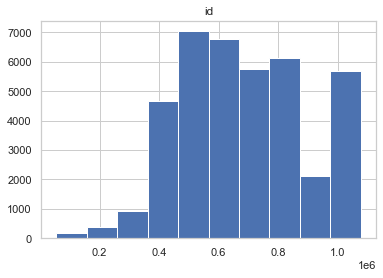

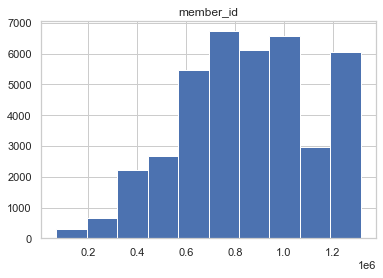

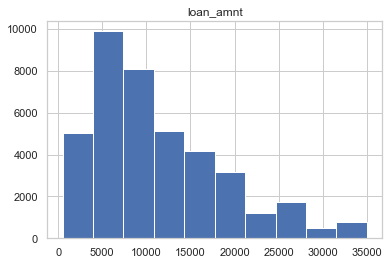

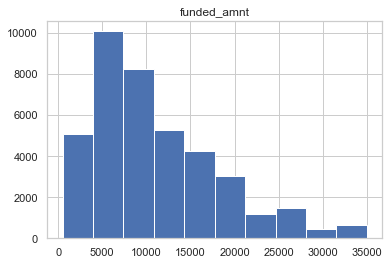

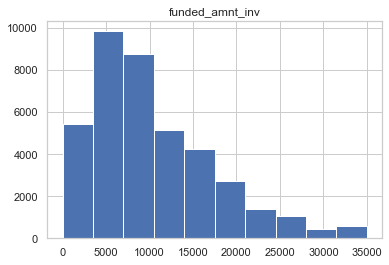

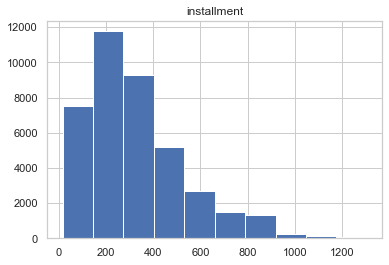

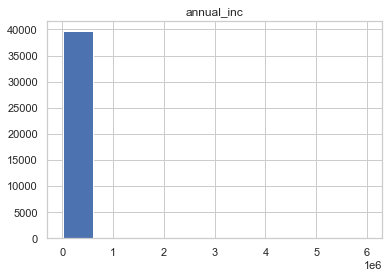

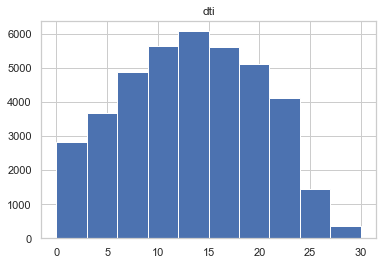

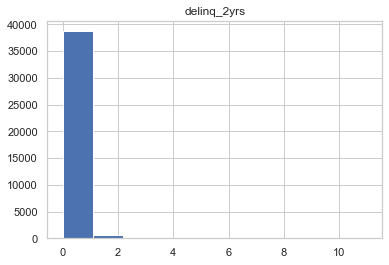

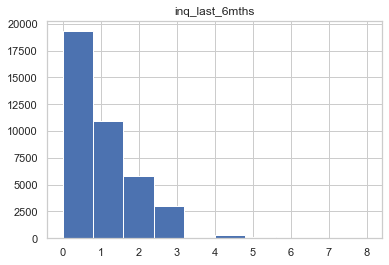

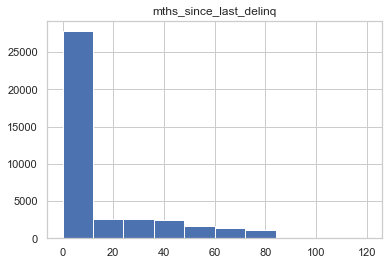

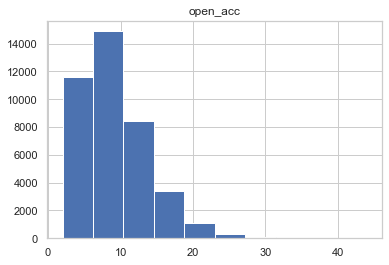

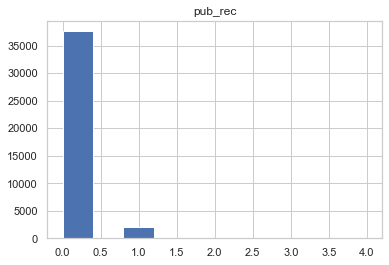

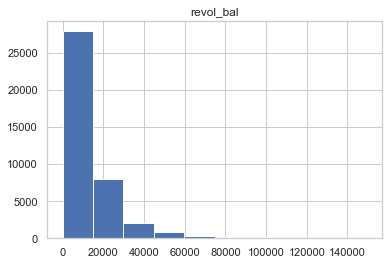

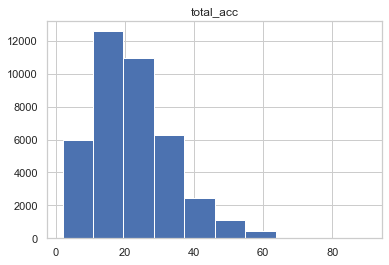

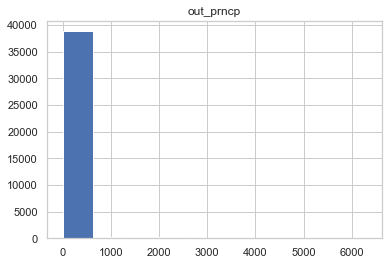

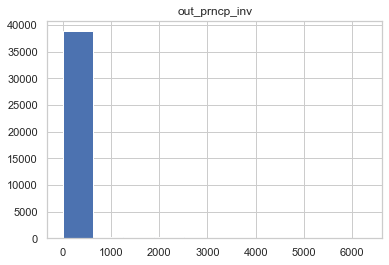

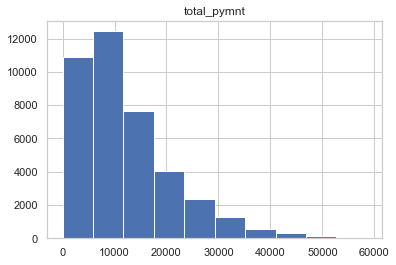

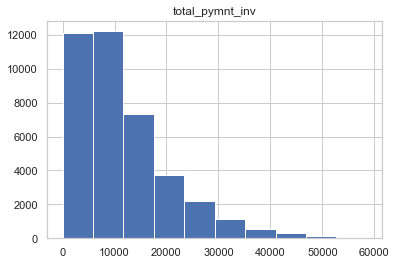

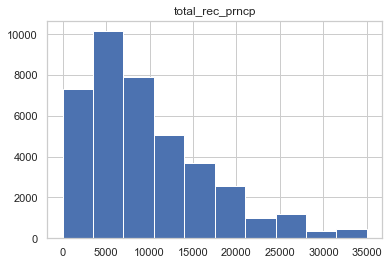

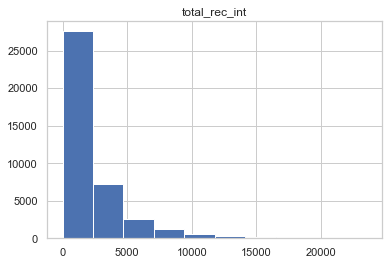

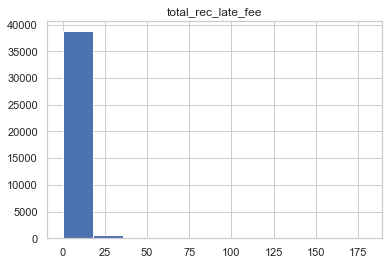

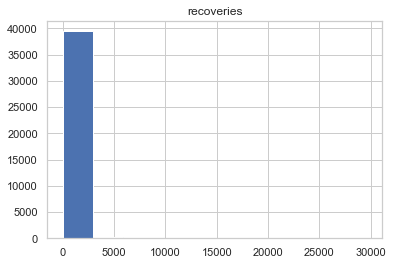

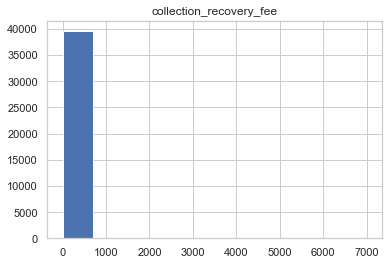

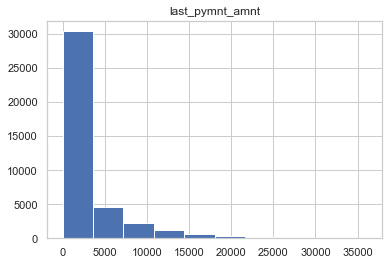

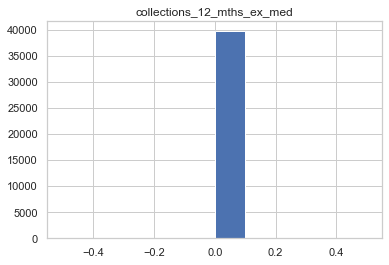

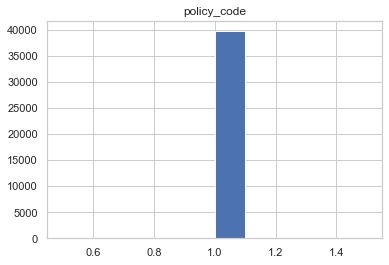

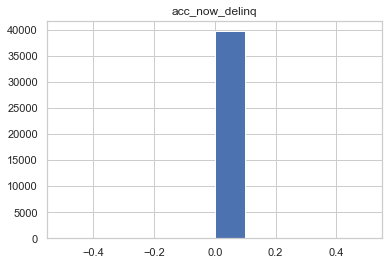

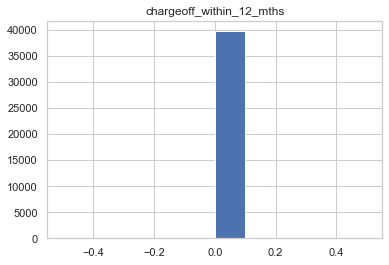

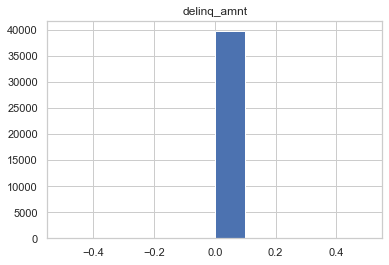

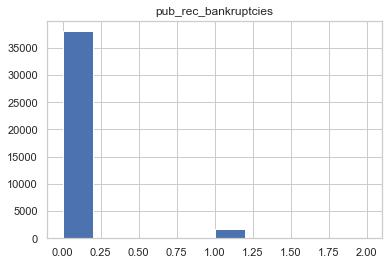

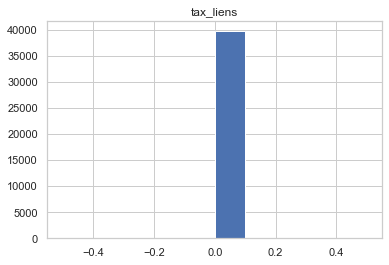

In [21]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

In [22]:
'''for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='loan_status', data=loan ,palette='plasma')
    plt.xlabel(i, fontsize=14)'''

"for i in cat[:-1]: \n    plt.figure(figsize=(15,10))\n    plt.subplot(2,3,1)\n    sns.countplot(x=i ,hue='loan_status', data=loan ,palette='plasma')\n    plt.xlabel(i, fontsize=14)"

In [24]:
#How many classes in target variable Income
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [25]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [26]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_ba

In [27]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [28]:
# to check duplicate row
df.duplicated().sum()

0

In [29]:
# Data have Int and object data types so we will split data in two seperate datas for int and obj
# #separate int64 and object type column into new dataframe.

loan_cat=loan.select_dtypes("object")
loan_num=loan.select_dtypes("int64")

In [30]:
loan_cat.dtypes

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
pymnt_plan             object
url                    object
desc                   object
purpose                object
title                  object
zip_code               object
addr_state             object
earliest_cr_line       object
revol_util             object
initial_list_status    object
last_pymnt_d           object
last_credit_pull_d     object
application_type       object
dtype: object

In [31]:
loan_num.dtypes

id                int64
member_id         int64
loan_amnt         int64
funded_amnt       int64
delinq_2yrs       int64
inq_last_6mths    int64
open_acc          int64
pub_rec           int64
revol_bal         int64
total_acc         int64
policy_code       int64
acc_now_delinq    int64
delinq_amnt       int64
dtype: object

In [32]:
# we just seperated both data types in new data fram
#convert object type data into Numeric type using LabelEncoder class
from sklearn.preprocessing import LabelEncoder
for col in loan_cat:
    #print(col)
    #create the object of LabelEncoder class
    le=LabelEncoder()
    loan_cat[col]=le.fit_transform(loan_cat[[col]])

In [33]:
loan_cat.dtypes

term                   int32
int_rate               int32
grade                  int32
sub_grade              int32
emp_title              int32
emp_length             int32
home_ownership         int32
verification_status    int32
issue_d                int32
loan_status            int32
pymnt_plan             int32
url                    int32
desc                   int32
purpose                int32
title                  int32
zip_code               int32
addr_state             int32
earliest_cr_line       int32
revol_util             int32
initial_list_status    int32
last_pymnt_d           int32
last_credit_pull_d     int32
application_type       int32
dtype: object

In [34]:
# so now loan_cat changed to int data types with this label encoder.
#now we need to club both int datas, so we will concatinate.
#concatenate loan_num and loan_cat and hold in new dataframe loan_new
loan_new=pd.concat([loan_num,loan_cat],axis=1)
loan_new.head()

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,policy_code,acc_now_delinq,delinq_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,0,1,3,0,13648,9,1,0,0,0,17,1,6,23197,1,4,2,13,2,0,4363,19923,1,2958,713,3,200,913,0,41,80,0
1,1077430,1314167,2500,2500,0,5,3,0,1687,4,1,0,0,1,158,2,13,18995,10,4,1,13,0,0,4362,19924,0,16197,277,10,42,982,0,5,103,0
2,1077175,1313524,2400,2400,0,2,2,0,2956,10,1,0,0,0,175,2,14,23197,1,4,0,13,2,0,4361,1,11,18885,502,14,387,1074,0,57,80,0
3,1076863,1277178,10000,10000,0,1,10,0,5598,37,1,0,0,0,99,2,10,331,1,4,1,13,2,0,4360,19879,9,18778,749,4,169,166,0,41,7,0
4,1075358,1311748,3000,3000,0,0,15,0,27783,38,1,0,0,1,74,1,9,23683,0,4,1,13,1,0,4359,19876,9,12357,798,36,211,565,0,76,80,0


In [35]:
# Now our whole data converted in same datatypes.


#select input and output 
X=loan_new.drop("loan_status",axis=1) #input select
Y=loan_new['loan_status']

In [37]:
X.head()

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,policy_code,acc_now_delinq,delinq_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,0,1,3,0,13648,9,1,0,0,0,17,1,6,23197,1,4,2,13,0,4363,19923,1,2958,713,3,200,913,0,41,80,0
1,1077430,1314167,2500,2500,0,5,3,0,1687,4,1,0,0,1,158,2,13,18995,10,4,1,13,0,4362,19924,0,16197,277,10,42,982,0,5,103,0
2,1077175,1313524,2400,2400,0,2,2,0,2956,10,1,0,0,0,175,2,14,23197,1,4,0,13,0,4361,1,11,18885,502,14,387,1074,0,57,80,0
3,1076863,1277178,10000,10000,0,1,10,0,5598,37,1,0,0,0,99,2,10,331,1,4,1,13,0,4360,19879,9,18778,749,4,169,166,0,41,7,0
4,1075358,1311748,3000,3000,0,0,15,0,27783,38,1,0,0,1,74,1,9,23683,0,4,1,13,0,4359,19876,9,12357,798,36,211,565,0,76,80,0


In [38]:
Y.head()

0    2
1    0
2    2
3    2
4    1
Name: loan_status, dtype: int32

In [39]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [40]:
# now we will apply standard scaling
#apply scalling on x_train and a_test
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #concvert into numpy array 
X_test=ss.transform(X_test)  #also convert into numpoy array

In [41]:
#create a user defined function
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    Y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix : ")
    #Confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [42]:
# as this problem is classification so we will use confusion matrix here.   for regration we used R2 score.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression

In [44]:
#create object of LogisticRegression class
lr=LogisticRegression(random_state=1)
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.41      0.01      0.01      1681
           1       0.44      0.24      0.31       352
           2       0.84      0.99      0.91      9883

    accuracy                           0.83     11916
   macro avg       0.56      0.41      0.41     11916
weighted avg       0.77      0.83      0.76     11916

Confusion Matrix : 
[[  12   35 1634]
 [   2   86  264]
 [  15   74 9794]]


In [48]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

Y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(Y_test, Y_predict))

# Accuracy score
DT_SC = accuracy_score(Y_predict,Y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.42      0.46      0.44      1681
           1       0.93      0.94      0.94       352
           2       0.90      0.89      0.90      9883

    accuracy                           0.83     11916
   macro avg       0.75      0.76      0.76     11916
weighted avg       0.84      0.83      0.84     11916

83.27% Accurate


In [49]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

Y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(Y_test, Y_predict))

# Accuracy score
RF_SC = accuracy_score(Y_predict,Y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.68      0.04      0.07      1681
           1       0.97      0.92      0.94       352
           2       0.86      1.00      0.92      9883

    accuracy                           0.86     11916
   macro avg       0.83      0.65      0.65     11916
weighted avg       0.83      0.86      0.80     11916

85.88% Accurate


In [50]:
#XGBoost:

XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

Y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(Y_test, Y_predict))

# Accuracy score
XGB_SC = accuracy_score(Y_predict,Y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.79      0.44      0.57      1681
           1       0.95      0.95      0.95       352
           2       0.91      0.98      0.94      9883

    accuracy                           0.90     11916
   macro avg       0.89      0.79      0.82     11916
weighted avg       0.90      0.90      0.89     11916

90.25% Accurate


In [51]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

Y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(Y_test, Y_predict))

# Accuracy score
LR_SC = accuracy_score(Y_predict,Y_test)
print('accuracy is',accuracy_score(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       0.41      0.01      0.01      1681
           1       0.44      0.24      0.31       352
           2       0.84      0.99      0.91      9883

    accuracy                           0.83     11916
   macro avg       0.56      0.41      0.41     11916
weighted avg       0.77      0.83      0.76     11916

accuracy is 0.8301443437395098


In [52]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,XGBoost,0.902484
1,Random Forest,0.858761
0,Decision Tree,0.832662
3,Logistic Regression,0.830144


In [ ]:
# Here most accurate is XG Boost @ 90% acccuracy 